# Program 9 

In [1]:
import numpy as np
import pandas as pd
import random
from base64 import b64encode
from json import loads

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from mlxtend.data import loadlocal_mnist

In [4]:
X, y = loadlocal_mnist(images_path='train-images.idx3-ubyte',labels_path='train-labels.idx1-ubyte')

In [5]:
X.shape

(60000, 784)

In [6]:
X = X.astype(float) / 255

In [7]:
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [8]:
np.bincount(y)

array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
      dtype=int64)

In [9]:
#np.savetxt(fname='images.csv', X=X, delimiter=',', fmt='%d')
#np.savetxt(fname='labels.csv', X=y, delimiter=',', fmt='%d')

In [10]:
from sklearn.cluster import MiniBatchKMeans

In [11]:
kmeans=MiniBatchKMeans(n_clusters = 10)

In [12]:
kmeans.fit(X)

MiniBatchKMeans(n_clusters=10)

In [13]:
len(kmeans.labels_)

60000

In [14]:
kmeans.predict(X[1:10])

array([0, 7, 1, 9, 8, 1, 3, 1, 9])

In [15]:
y[1:10]

array([0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [16]:
def infer_cluster_labels(kmeans, actual_labels):
    """
    Associates most probable label with each cluster in KMeans model
    returns: dictionary of clusters assigned to each label
    """

    inferred_labels = {}

    for i in range(kmeans.n_clusters):

        # find index of points in cluster
        labels = []
        index = np.where(kmeans.labels_ == i)

        # append actual labels for each point in cluster
        labels.append(actual_labels[index])

        # determine most common label
        if len(labels[0]) == 1:
            counts = np.bincount(labels[0])
        else:
            counts = np.bincount(np.squeeze(labels))

        # assign the cluster to a value in the inferred_labels dictionary
        if np.argmax(counts) in inferred_labels:
            # append the new number to the existing array at this slot
            inferred_labels[np.argmax(counts)].append(i)
        else:
            # create a new array in this slot
            inferred_labels[np.argmax(counts)] = [i]

        #print(labels)
        #print('Cluster: {}, label: {}'.format(i, np.argmax(counts)))
        
    return inferred_labels

In [17]:
def infer_data_labels(X_labels, cluster_labels):
    """
    Determines label for each array, depending on the cluster it has been assigned to.
    returns: predicted labels for each array
    """
    
    # empty array of len(X)
    predicted_labels = np.zeros(len(X_labels)).astype(np.uint8)
    
    for i, cluster in enumerate(X_labels):
        for key, value in cluster_labels.items():
            if cluster in value:
                predicted_labels[i] = key
                
    return predicted_labels

In [18]:
cluster_labels = infer_cluster_labels(kmeans, y)

In [19]:
X_clusters = kmeans.predict(X)

In [20]:
predicted_labels = infer_data_labels(X_clusters, cluster_labels)


In [21]:
print(predicted_labels[:20])
print(y[:20])

[8 0 4 1 9 2 1 8 1 9 3 1 3 6 1 7 2 8 6 9]
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


In [22]:
from sklearn import metrics

def calculate_metrics(estimator, data, labels):

    # Calculate and print metrics
    print('Number of Clusters: {}'.format(estimator.n_clusters))
    print('Inertia: {}'.format(estimator.inertia_))
    print('Homogeneity: {}'.format(metrics.homogeneity_score(labels, estimator.labels_)))

In [23]:
clusters = [10, 16, 36, 64, 144, 256]

# test different numbers of clusters
for n_clusters in clusters:
    estimator = MiniBatchKMeans(n_clusters = n_clusters)
    estimator.fit(X)
    
    # print cluster metrics
    calculate_metrics(estimator, X, y)
    
    # determine predicted labels
    cluster_labels = infer_cluster_labels(estimator, y)
    predicted_y = infer_data_labels(estimator.labels_, cluster_labels)
    
    # calculate and print accuracy
    print('Accuracy: {}\n'.format(metrics.accuracy_score(y, predicted_y)))

Number of Clusters: 10
Inertia: 2397031.08826656
Homogeneity: 0.4544113790209659
Accuracy: 0.5312666666666667

Number of Clusters: 16
Inertia: 2199841.202746812
Homogeneity: 0.565571278942679
Accuracy: 0.66385

Number of Clusters: 36
Inertia: 1969799.55475226
Homogeneity: 0.6876629890968593
Accuracy: 0.7732166666666667

Number of Clusters: 64
Inertia: 1830539.40421789
Homogeneity: 0.7432238557848737
Accuracy: 0.8242333333333334

Number of Clusters: 144
Inertia: 1632206.7264671605
Homogeneity: 0.8021352674425368
Accuracy: 0.8646666666666667

Number of Clusters: 256
Inertia: 1520147.2289005471
Homogeneity: 0.8333756935589524
Accuracy: 0.8871



In [24]:
X_test,y_test=loadlocal_mnist(images_path='t10k-images.idx3-ubyte',labels_path='t10k-labels.idx1-ubyte')

In [25]:
kmeans = MiniBatchKMeans(n_clusters = 256)
kmeans.fit(X)
cluster_labels = infer_cluster_labels(kmeans, y)

# predict labels for testing data
test_clusters = kmeans.predict(X_test)
predicted_labels = infer_data_labels(kmeans.predict(X_test), cluster_labels)
    
# calculate and print accuracy
print('Accuracy: {}\n'.format(metrics.accuracy_score(y_test, predicted_labels)))

Accuracy: 0.5932



C:\Users\Sonal\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


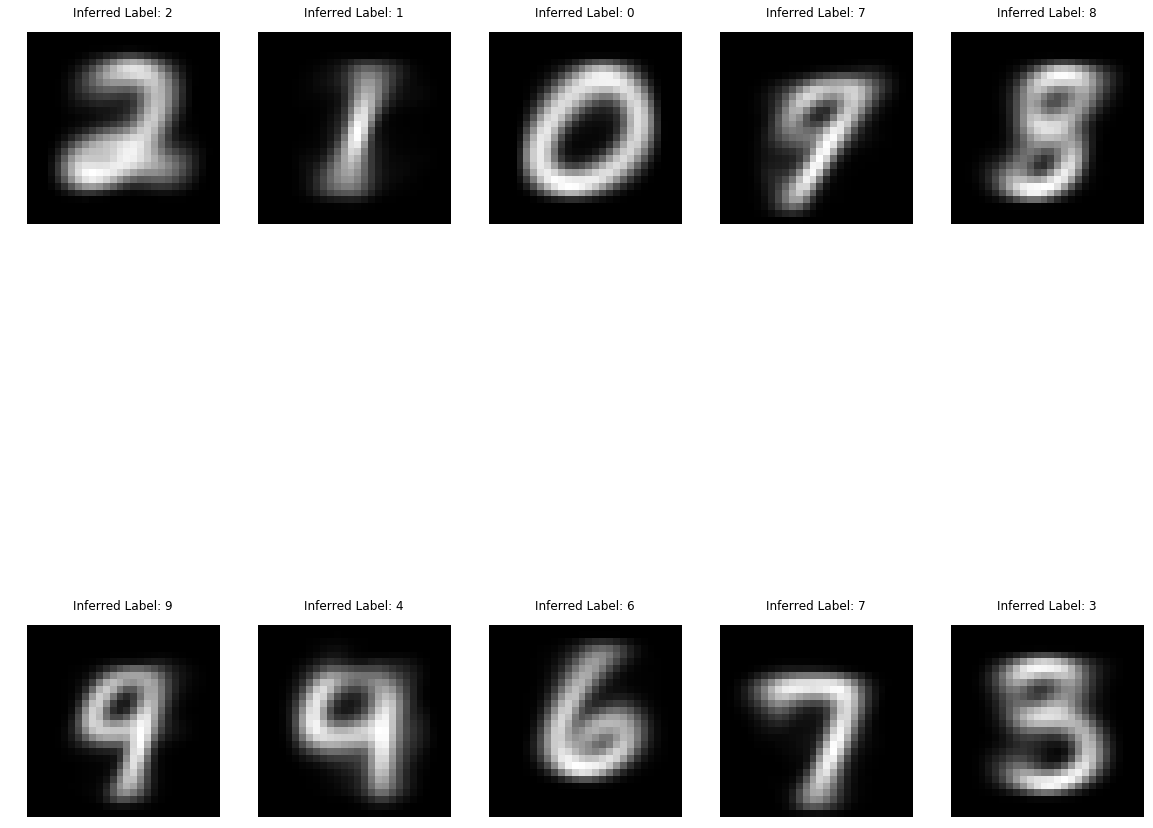

In [26]:

# Initialize and fit KMeans algorithm
kmeans = MiniBatchKMeans(n_clusters = 10)
kmeans.fit(X)

# record centroid values
centroids = kmeans.cluster_centers_

# reshape centroids into images
images = centroids.reshape(10, 28, 28)
images *= 255
images = images.astype(np.uint8)

# determine cluster labels
cluster_labels = infer_cluster_labels(kmeans, y)

# create figure with subplots using matplotlib.pyplot
fig, axs = plt.subplots(2, 5, figsize = (20, 20))
plt.gray()

# loop through subplots and add centroid images
for i, ax in enumerate(axs.flat):
    
    # determine inferred label using cluster_labels dictionary
    for key, value in cluster_labels.items():
        if i in value:
            ax.set_title('Inferred Label: {}'.format(key))
    
    # add image to subplot
    ax.matshow(images[i])
    ax.axis('off')
    
# display the figure
fig.show()